In [7]:
import os

import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set_style("ticks")

from IPython.core.pylabtools import figsize
figsize(12, 8)

In [8]:
transcript_dir = "data/speech_transcriptions/train/tokenized"
ngram_dir = "data/features/speech_transcriptions/ngrams/2/train"
arpabet_dir = "data/features/speech_transcriptions/arpabets/train"
file_list = os.listdir(ngram_dir)

In [9]:
ngram_length_dict = {}
arpabet_length_dict = {}

for fl in file_list:
    ngram_length_dict[fl] = len(open(os.path.join(ngram_dir, fl)).read().split())
    arpabet_length_dict[fl] = len(open(os.path.join(arpabet_dir, fl)).read().split())

In [14]:
ngram_line_length = []
arpabet_line_length = []

for fl in file_list:
    ngram_line_length += [len(line.split()) for line in open(os.path.join(ngram_dir, fl)).readlines()]
    arpabet_line_length += [len(line.split()) for line in open(os.path.join(arpabet_dir, fl)).readlines()]

/usr/lib/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


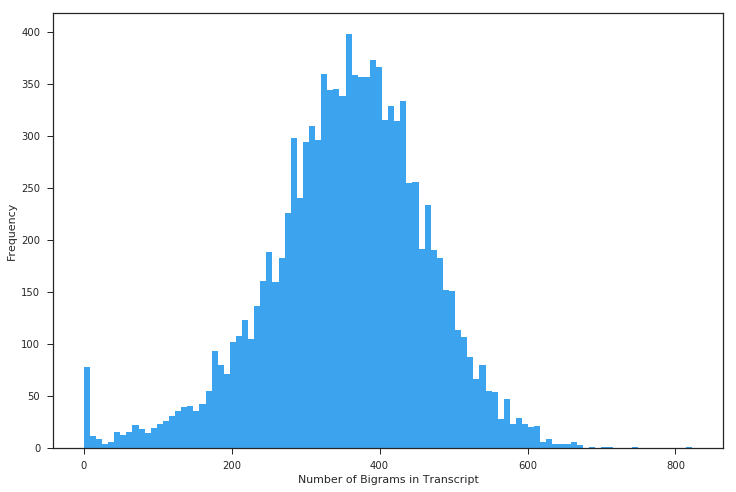

In [8]:
fig1, ax1 = plt.subplots()
sns.set_palette(sns.husl_palette(1, h=0.68))
n, bins, patches = ax1.hist(list(ngram_length_dict.values()), bins=100)
ax1.set_xlabel('Number of Bigrams in Transcript')
ax1.set_ylabel('Frequency')

/usr/lib/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


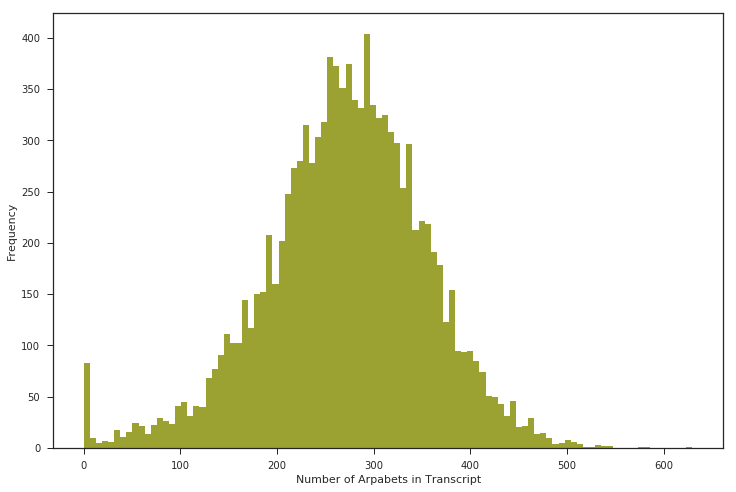

In [10]:
fig1, ax1 = plt.subplots()
sns.set_palette(sns.husl_palette(1, h=0.25))
n, bins, patches = ax1.hist(list(arpabet_length_dict.values()), bins=100)
ax1.set_xlabel('Number of Arpabets in Transcript')
ax1.set_ylabel('Frequency')

/usr/lib/anaconda3/envs/sergey/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


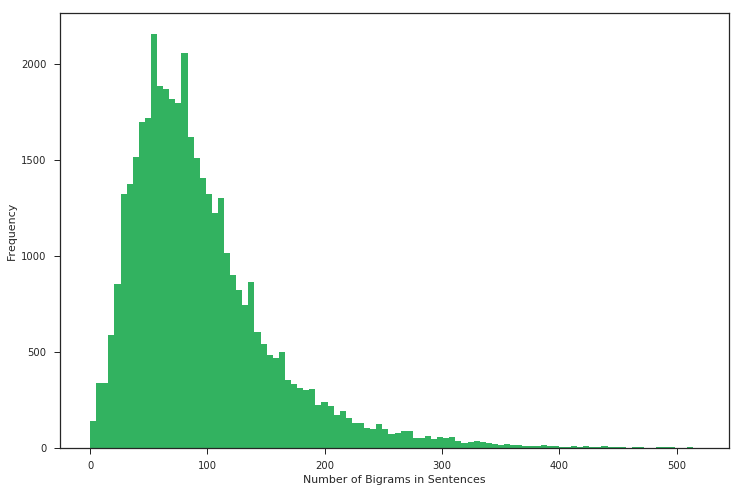

In [13]:
fig1, ax1 = plt.subplots()
sns.set_palette(sns.husl_palette(1, h=0.38))
n, bins, patches = ax1.hist(ngram_line_length, bins=100)
ax1.set_xlabel('Number of Bigrams in Sentences')
ax1.set_ylabel('Frequency')

/usr/lib/anaconda3/envs/sergey/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


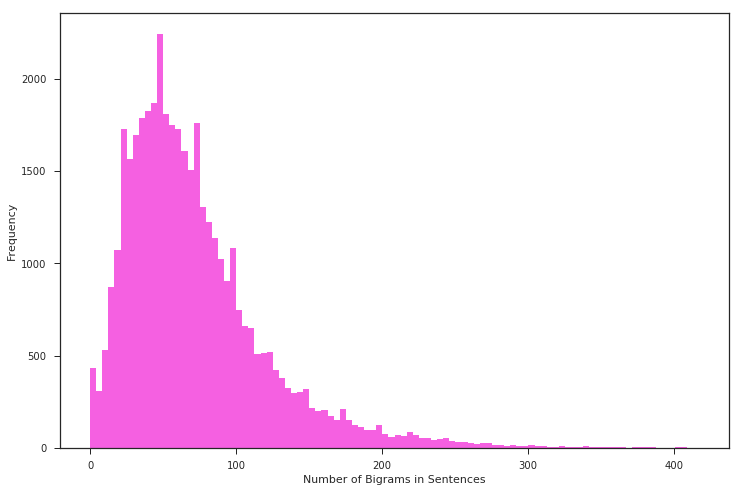

In [16]:
fig1, ax1 = plt.subplots()
sns.set_palette(sns.husl_palette(1, h=0.88))
n, bins, patches = ax1.hist(arpabet_line_length, bins=100)
ax1.set_xlabel('Number of Bigrams in Sentences')
ax1.set_ylabel('Frequency')

In [6]:
word_length = []

for fl in file_list:
    words = open(os.path.join(transcript_dir, fl)).read().split()
    word_length += [len(w) for w in words if w.isalnum()]

/usr/lib/anaconda3/envs/sergey/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


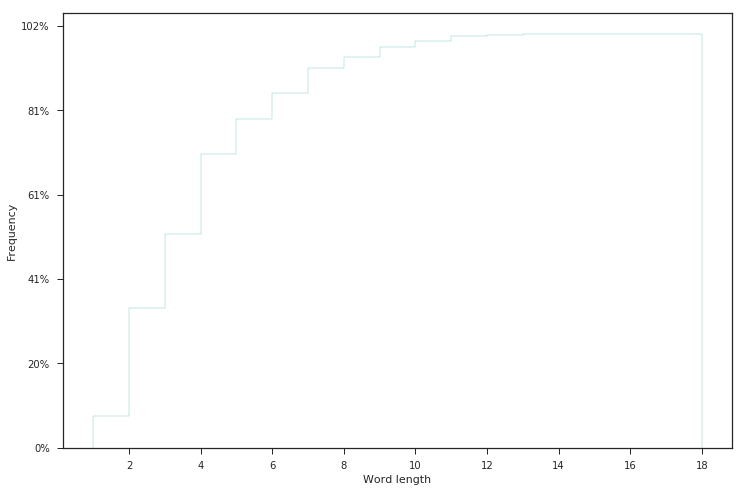

In [30]:
fig1, ax1 = plt.subplots()
# sns.set_palette(sns.husl_palette(1, h=0.5))
n, bins, patches = ax1.hist(word_length, histtype='step', bins=range(min(word_length), max(word_length)), cumulative=True)
ax1.set_xlabel('Word length')
ax1.set_ylabel('Frequency')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:.0%}'.format(x/len(word_length)) for x in vals])

In [11]:
import nltk
cmu_rev_dict = nltk.corpus.cmudict.dict()

arpabet_len = []
for fl in file_list:
    words = open(os.path.join(transcript_dir, fl)).read().split()
    arpabet_len += [len(cmu_rev_dict[w][0]) for w in words if w in cmu_rev_dict]

/usr/lib/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


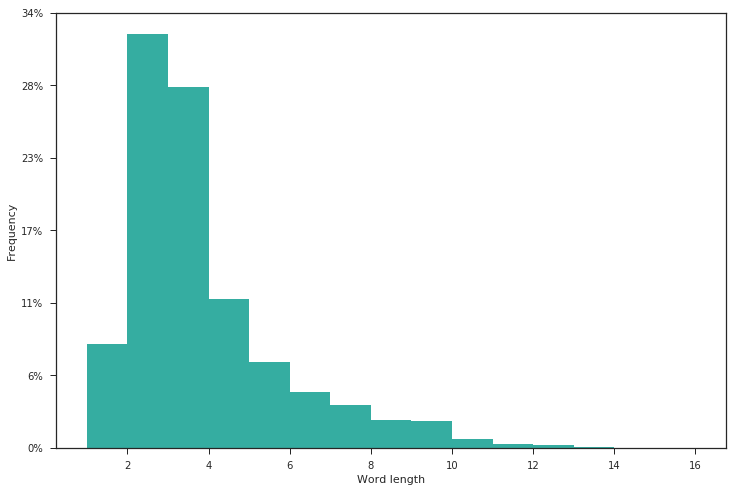

In [17]:
fig1, ax1 = plt.subplots()
sns.set_palette(sns.husl_palette(1, h=0.5))
n, bins, patches = ax1.hist(arpabet_len, bins=range(min(arpabet_len), max(arpabet_len)), cumulative=False)
ax1.set_xlabel('Word length')
ax1.set_ylabel('Frequency')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:.0%}'.format(x/len(arpabet_len)) for x in vals])